# IMAGENET - VGG16 - OBJECT DETECTION

* The ImageNet project is a large database of images designed for use in visual object recognition software research.
* A pre-trained model will be used in the ImageNet dataset. The 16-layer VGG Net (VGG16) model will be used.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import numpy as np
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions

## Loading A Pre-Trained Model

In [3]:
model = VGG16(weights = 'imagenet', include_top=True)

553467096/553467096 [==============================] - 24s 0us/step


 * Take a look at the model structure: What layers are there and what are the features of layers?

In [4]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

* The total number of parameters can also give an idea.

In [5]:
model.count_params()

138357544

* Look at the filenames of the test images and call those images for testing.

In [7]:
import os 
os.chdir("/content/images")

In [14]:
!ls

akinci.jpeg  f16.jpg   olips3.jpeg  README.md
betty.jpg    inek.jpg  olips.jpeg   van-kedisi.jpg


* Upload a test image and preprocess it.

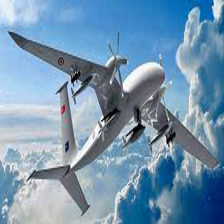

In [16]:
image_path = 'akinci.jpeg'
image = Image.open(image_path) 
image = image.resize((224, 224))
image

In [17]:
x = np.array(image, dtype = 'float32') #converts image to array
x = np.expand_dims(x, axis=0) #converts to array list
x= preprocess_input(x)

## Classification by Test Image

In [18]:
preds = model.predict(x)
print('predicted:', decode_predictions(preds, top=3)[0]) # top 3 means the first 3 values ​​in the classification.
print(decode_predictions(preds, top=1)[0][0][1])

1/1 [==============================] - 0s 37ms/step
predicted: [('n04552348', 'warplane', 0.6365595), ('n04592741', 'wing', 0.18588257), ('n02690373', 'airliner', 0.15400246)]
warplane
